### Урок 7. Многомерный статистический анализ. Линейная регрессия

#### Задача 1

Дана матрица объект-признак

In [191]:
X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

In [192]:
Y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

#### 1.Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.

In [193]:
# найти R^2 пары признаков: 1-2, 1-3, 1-4, 2-3, 2-4, 3-4, какой R^2 будет наилучший

In [194]:
X

[[1.22401313, 2.30868478, 3.03636353, 2.69287214],
 [-0.18757272, 1.30337355, 5.12093014, 3.46363202],
 [-0.81094525, 1.82463398, 5.79686488, 1.86159445],
 [0.75129018, 2.67392052, 3.65529809, 1.66746094],
 [0.00972362, 1.97367255, 2.50594319, 1.69755173],
 [-0.62972637, 0.77750764, 2.84124027, 4.54410559],
 [2.29536229, 1.81206697, 1.95026215, 1.51874636],
 [0.0920418, 2.26971361, 7.47708735, 2.61081203],
 [2.39252799, 3.17563985, 3.61420599, 5.10773362],
 [0.54983815, 2.87988651, 1.65752765, 1.59635987]]

In [195]:
import pandas as pd
import numpy as np

In [196]:
df_x=pd.DataFrame(X, columns=['X1','X2','X3', 'X4']) 
df_y = pd.DataFrame(Y, columns=['Y1']) 

In [197]:
x12 = df_x[['X1', 'X2']].values
x13 = df_x[['X1', 'X3']].values
x14 = df_x[['X1', 'X4']].values
x23 = df_x[['X2', 'X3']].values
x24 = df_x[['X2', 'X4']].values
x34 = df_x[['X3', 'X4']].values
y = df_y['Y1'].values

In [198]:
x12.shape, x13.shape

((10, 2), (10, 2))

In [199]:
ones = np.ones((x12.shape[0], 1))
x12 = np.hstack((ones, x12))
x13 = np.hstack((ones, x13))
x14 = np.hstack((ones, x14))
x23 = np.hstack((ones, x23))
x24 = np.hstack((ones, x24))
x34 = np.hstack((ones, x34))

In [200]:
x12.shape, x13.shape

((10, 3), (10, 3))

In [201]:
x34

array([[1.        , 3.03636353, 2.69287214],
       [1.        , 5.12093014, 3.46363202],
       [1.        , 5.79686488, 1.86159445],
       [1.        , 3.65529809, 1.66746094],
       [1.        , 2.50594319, 1.69755173],
       [1.        , 2.84124027, 4.54410559],
       [1.        , 1.95026215, 1.51874636],
       [1.        , 7.47708735, 2.61081203],
       [1.        , 3.61420599, 5.10773362],
       [1.        , 1.65752765, 1.59635987]])

In [202]:
XTX_12 = x12.T.dot(x12)
np.linalg.det(XTX_12)

349.7782033818847

In [203]:
XTX_13 = x13.T.dot(x13)
np.linalg.det(XTX_13)

2835.3600226240965

In [204]:
XTX_14 = x14.T.dot(x14)
np.linalg.det(XTX_14)

1689.2124743606066

In [205]:
XTX_23 = x23.T.dot(x23)
np.linalg.det(XTX_23)

1427.812577608152

In [206]:
XTX_24 = x24.T.dot(x24)
np.linalg.det(XTX_24)

701.7327364453164

In [207]:
XTX_34 = x34.T.dot(x34)
np.linalg.det(XTX_34)

4547.328074863321

In [208]:
XTX_inv_12 = np.linalg.inv(XTX_12)
b12 = XTX_inv_12.dot(x12.T).dot(y)

XTX_inv_13 = np.linalg.inv(XTX_13)
b13 = XTX_inv_13.dot(x13.T).dot(y)

XTX_inv_14 = np.linalg.inv(XTX_14)
b14 = XTX_inv_14.dot(x14.T).dot(y)

XTX_inv_23 = np.linalg.inv(XTX_23)
b23 = XTX_inv_23.dot(x23.T).dot(y)

XTX_inv_24 = np.linalg.inv(XTX_24)
b24 = XTX_inv_24.dot(x24.T).dot(y)

XTX_inv_34 = np.linalg.inv(XTX_34)
b34 = XTX_inv_34.dot(x34.T).dot(y)
print(b12)

[6.70781579 0.40786841 1.03360247]


In [209]:
from sklearn.linear_model import LinearRegression
model12 = LinearRegression().fit(x12, y)
model13 = LinearRegression().fit(x13, y)
model14 = LinearRegression().fit(x14, y)
model23 = LinearRegression().fit(x23, y)
model24 = LinearRegression().fit(x24, y)
model34 = LinearRegression().fit(x34, y)
print(type(model12))
model12.intercept_, model12.coef_

<class 'sklearn.linear_model._base.LinearRegression'>


(6.7078157904977385, array([0.        , 0.40786841, 1.03360247]))

In [210]:
model13.intercept_, model13.coef_

(3.624556949385112, array([0.        , 1.62531203, 1.21134979]))

In [211]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [212]:
z12 = x12.dot(b12)
R12 = 1 - ((y - z12)**2).sum() / sum_of_squares(y)
R12

0.18113594742585204

In [213]:
z13 = x13.dot(b13)
R13 = 1 - ((y - z13)**2).sum() / sum_of_squares(y)
R13

0.7634246238793151

In [214]:
z14 = x14.dot(b14)
R14 = 1 - ((y - z14)**2).sum() / sum_of_squares(y)
R14

0.4532966783144079

In [215]:
z23 = x23.dot(b23)
R23 = 1 - ((y - z23)**2).sum() / sum_of_squares(y)
R23

0.547948273403901

In [216]:
z24 = x24.dot(b24)
R24 = 1 - ((y - z24)**2).sum() / sum_of_squares(y)
R24

0.6062055761129932

In [217]:
z34 = x34.dot(b34)
R34 = 1 - ((y - z34)**2).sum() / sum_of_squares(y)
R34

0.622441987650532

#### Наилучший результат модель линейной регрессии дает при выборе первого и третьго признаков (R13 =0.7634246238793151  )

#### 2.Является ли значимым получившееся уравнение регрессии?

In [218]:
#Возьмём уровень значимости  𝛼=0.05
alpha = 0.05

In [219]:
n = x12.shape[0]
m = x12.shape[1] - 1  # поскольку добавляли фиктивный столбец

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [220]:
from scipy import stats

In [221]:
#Критическая область:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Критическая область: $\Omega_\alpha = \left( 4.73, \infty \right)$

In [222]:
# Статистика не попала в критическую область, уравнение регрессии не признаётся значимым.
F12 = (R12 / k1) / ((1 - R12) / k2)
F12

0.7742137586789178

In [223]:
# Статистика попала в критическую область, уравнение регрессии признаётся значимым.
F13 = (R13 / k1) / ((1 - R13) / k2)
F13

11.294439122922642

In [224]:
# Статистика не попала в критическую область, уравнение регрессии не признаётся значимым.
F14 = (R14 / k1) / ((1 - R14) / k2)
F14

2.902009757703361

In [225]:
# Статистика не попала в критическую область, уравнение регрессии не признаётся значимым.
F23 = (R23 / k1) / ((1 - R23) / k2)
F23

4.242476787677871

In [226]:
# Статистика попала в критическую область, уравнение регрессии признаётся значимым.
F24 = (R24 / k1) / ((1 - R24) / k2)
F24

5.387886134731737

In [227]:
# Статистика попала в критическую область, уравнение регрессии признаётся значимым.
F34 = (R34 / k1) / ((1 - R34) / k2)
F34

5.770098595498478

In [228]:
import statsmodels.api as sm
model = sm.OLS(y, x13)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     11.29
Date:                Sun, 03 Oct 2021   Prob (F-statistic):            0.00644
Time:                        06:48:58   Log-Likelihood:                -15.767
No. Observations:                  10   AIC:                             37.53
Df Residuals:                       7   BIC:                             38.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6246      1.261      2.875      0.0

D:\Learning\LibPythonForDS\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### С учетом признака значимости, наилучший результат модель линейной регрессии дает при выборе первого и третьго признаков <br>(R13 =0.7634246238793151 )

### Задача 2
Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):


In [229]:
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.<br>

1.Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.<br>
2.Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.<br>
3.Посчитайте коэффициент детерминации.<br>
4.Оцените построенное уравнение регрессии с помощью F-критерия Фишера.<br>
5.(доп) Посчитать среднюю ошибку аппроксимации

In [230]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

#### 1.Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

In [231]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)

b0, b1

(444.1773573243596, 2.620538882402765)

In [232]:
x2 = pd.DataFrame(salary)
y2 = pd.DataFrame(scoring)
x2.shape

(10, 1)

In [233]:
x2.shape, y2.shape

((10, 1), (10, 1))

In [234]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [236]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

349464.00000000023

In [237]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[444.17735732]
 [  2.62053888]]


#### 2.Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

In [238]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

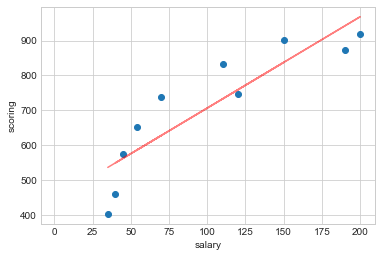

In [240]:
ox = x2
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

#### 3.Посчитайте коэффициент детерминации.

In [241]:
z1 = b0 + b1 * salary

In [243]:
R1 = 1 - ((scoring - z1)**2).sum() / sum_of_squares(scoring)
print(f'коэффициент детерминации: {R1}')

коэффициент детерминации: 0.7876386635293686


#### 4.Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

In [244]:
n = salary.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [245]:
#Возьмём уровень значимости  𝛼=0.05
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

Критическая область: $\Omega_\alpha = \left( 5.31765, \infty \right)$

In [246]:
#Считаем значение статистики:
F = (R1 / k1) / ((1 - R1) / k2)
F

29.67164085966451

Статистика попала в критическую область, уравнение регрессии признаётся значимым

#### 5.(доп) Посчитать среднюю ошибку аппроксимации

In [248]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()
  

A = mean_approximation_error(scoring, z1)
print(f'Cредняя ошибка аппроксимации:{A}')

Cредняя ошибка аппроксимации:0.11469251843561709
